## Importing required libraries

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Layer
from keras.utils import np_utils
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

## Extracting data from zip file

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Fire-Detection.zip') as file:
    file.extractall("")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# files in data folder
os.listdir('/content/Fire-Detection')

['1', '0']

## Reading contents inside the folder

In [ ]:
print(len(os.listdir('/content/Fire-Detection/0')))
print(len(os.listdir('/content/Fire-Detection/1')))

541
110


## Separating images and labels

In [ ]:
# Train set
fire_data = os.listdir('/content/Fire-Detection')

X = []
y = []

for each in fire_data:
    fire = os.listdir('/content/Fire-Detection/' +each)
    for image in fire:
        #print(image)
        img = '/content/Fire-Detection/' +each + "/" +image
        new_img = cv2.imread(img)
        new_img = cv2.resize(new_img,(224,224))
        X.append(new_img)
        y.append(each)

In [ ]:
print("Length of x : ", len(X))

Length of x :  651


## Converting data into array

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(651, 224, 224, 3)

In [ ]:
y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

## Visualizing some images

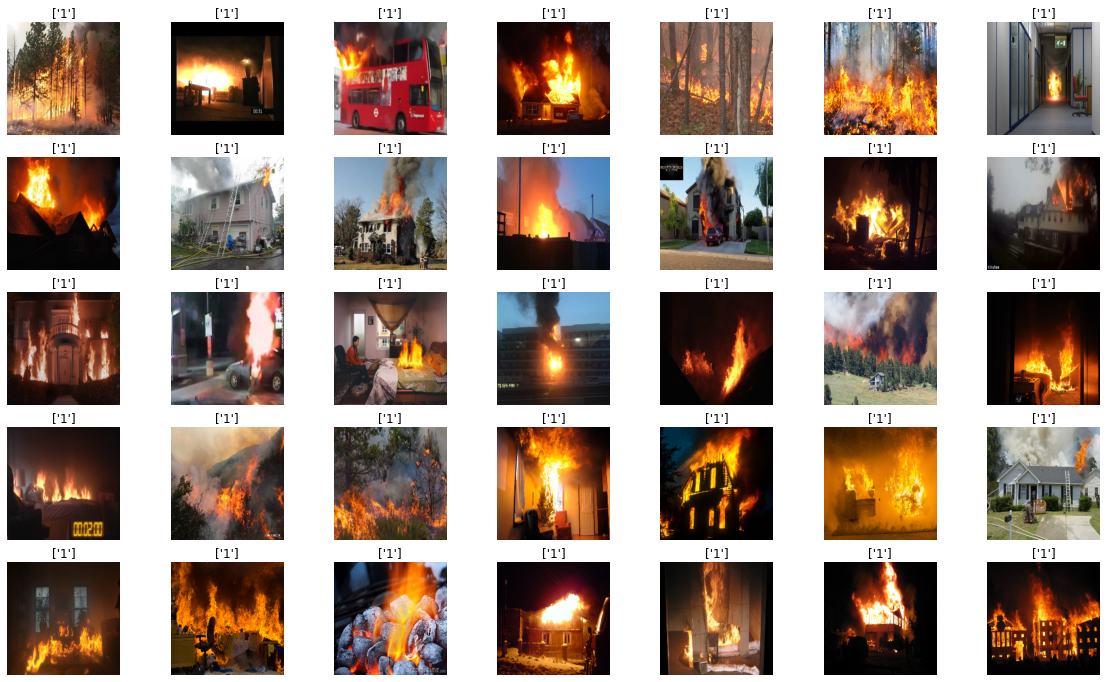

In [ ]:
fig, axes = plt.subplots(5, 7, figsize=(20,12))
axes = axes.ravel()

for i in np.arange(0, 35):
    axes[i].imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title([y[i]])

## Splitting data into train and test set

In [ ]:
# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
print("X_train : ", X_train.shape, "y_train : ", y_train.shape)
print("X_val : ", X_test.shape, "y_val : ", y_test.shape)

X_train :  (455, 224, 224, 3) y_train :  (455,)
X_val :  (196, 224, 224, 3) y_val :  (196,)


In [ ]:
X_test[1]

array([[[120, 127, 146],
        [ 51,  57,  74],
        [ 84,  88, 103],
        ...,
        [188, 199, 189],
        [209, 211, 195],
        [205, 211, 198]],

       [[113, 120, 139],
        [102, 109, 126],
        [ 83,  89, 104],
        ...,
        [182, 193, 183],
        [198, 209, 194],
        [189, 203, 203]],

       [[112, 119, 138],
        [125, 132, 149],
        [ 90,  95, 110],
        ...,
        [176, 189, 186],
        [190, 206, 202],
        [163, 185, 210]],

       ...,

       [[ 18,  14,  16],
        [ 39,  35,  53],
        [ 42,  38,  63],
        ...,
        [191, 162, 181],
        [176, 137, 165],
        [182, 150, 175]],

       [[ 30,  21,  31],
        [ 41,  33,  51],
        [ 35,  27,  50],
        ...,
        [198, 164, 186],
        [169, 135, 165],
        [181, 149, 174]],

       [[ 29,  17,  32],
        [ 41,  30,  51],
        [ 32,  21,  44],
        ...,
        [195, 160, 186],
        [176, 145, 176],
        [182, 150, 175]]

In [ ]:
# Encoding categorical variable
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [ ]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## VGG16

In [ ]:
model = VGG16(include_top=True, weights='imagenet')

553476096/553467096 [==============================] - 3s 0us/step


In [ ]:
# Here is the architecture of VGG16
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_input = model.layers[0].input 
model_output = model.layers[-2].output 
predictions = Dense(1, activation='sigmoid')(model_output)

In [ ]:
new_model = Model(inputs=model_input, outputs=predictions)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = new_model.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
10/10 [==============================] - 860s 84s/step - loss: 78.2535 - accuracy: 0.5495
Epoch 2/10
10/10 [==============================] - 851s 84s/step - loss: 0.4474 - accuracy: 0.8462
Epoch 3/10
10/10 [==============================] - 847s 84s/step - loss: 0.4192 - accuracy: 0.8462
Epoch 4/10
10/10 [==============================] - 849s 84s/step - loss: 0.3865 - accuracy: 0.8462
Epoch 5/10
 2/10 [=====>........................] - ETA: 12:18 - loss: 0.7496 - accuracy: 0.2300

## Evaluating model

In [ ]:
new_model.evaluate(X_test, y_test)

## Saving model

In [ ]:
new_model.save("demo.h5")

## Confusion Matrix

In [ ]:
ypred = new_model.predict_classes(X_test)
plt.subplots(figsize=(6,6))

sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt="1.0f",cbar=False,annot_kws={"size": 20})

plt.title(f"CNN Accuracy: {round(accuracy_score(ypred,y_test),2)}",fontsize=30)
plt.xlabel("Target",fontsize=20)
plt.show()

## Predictions

In [ ]:
#with fire
sample_img = cv2.imread('Add path of any image of fire.jpg',)
sample_img = cv2.resize(sample_img,(224,224))
plt.imshow(sample_img)
sample_img = np.reshape(sample_img,[1,224,224,3])

In [ ]:
new_model.predict(sample_img)

In [ ]:
pred = new_model.predict(sample_img)
pred = np.argmax(pred,axis=1)
pred

## Real Time Testing

In [ ]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from keras.models import load_model
#Load the saved model
model = load_model('demo.h5')
video = cv2.VideoCapture(0)
while True:
        _, frame = video.read()
#Convert the captured frame into RGB
        im = Image.fromarray(frame, 'RGB')
#Resizing into 224x224 because we trained the model with this image size.
        im = im.resize((224,224))
        img_array = image.img_to_array(im)
        #img_array = np.expand_dims(img_array, axis=0) / 255
        probabilities = model.predict(img_array)[0]
        #Calling the predict method on model to predict 'fire' on the image
        prediction = np.argmax(probabilities)
        #if prediction is 0, which means there is fire in the frame.
        if prediction == 0:
                frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
                print(probabilities[prediction])
cv2.imshow("Capturing", frame)
        key=cv2.waitKey(1)
        if key == ord('q'):
                break
video.release()
cv2.destroyAllWindows()